## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 1. Работа с изображениями

### 1. Что вас ждёт в этом модуле?

→ Не секрет, что проектирование архитектуры модели — это только 50% успеха в решении задачи Data Science. Оставшаяся половина — правильная подготовка данных. 

Этот модуль посвящен знакомству со способами предобработки изображений для различных задач компьютерного зрения. 

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- Что представляет из себя изображение?

- Какими способами можно обработать и трансформировать изображение?

- gКакие требования к картинкам существуют в зависимости от задачи компьютерного зрения?

- Что такое аугментации и зачем они нужны?

### ВЫ НАУЧИТЕСЬ:

- Загружать изображения, делать предобработку и трансформировать картинки с помощью библиотек openCV и scikit-image.

- Пользоваться инструментами albumentations и torchvision.transforms для аугментации и расширения тренировочного датасета.

- Использовать популярные сервисы для разметки изображений.

- Писать класс Dataset для подготовки загрузки датасета перед переходом к задаче.

✏️ В конце этого модуля на основе этих навыков вы подготовите датасет для решения задачи сегментации изображений.

Для освоения модуля может потребоваться повторить такие темы:

→ Объектно-ориентированное программирование. Вспомните, какие требования предъявляются к кастомным классам, которые вы пишете на Python.

→ Работа с фреймворком PyTorch для реализации моделей.

→ Задача сегментации в компьютерном зрении и методы её решения — для финального задания модуля.

#### АВТОР МОДУЛЯ

Андрей Казначеев,
NLP Researcher, Сбер

### 2. Что такое изображение?

→ Прежде чем приступить к способам обработки изображений, необходимо вспомнить, что такое изображение. 


**Изображение** — это матрица **интенсивностей** света, пришедшего на соответствующий пиксель матрицы фотоаппарата. 

В случае _монохромного_ изображения — это одна двумерная матрица, в которой хранятся **числа от 0 до 255**, где 0 соответствует чёрному цвету, а 255 — белому.

### КАК ПОЛУЧАЕТСЯ ЦВЕТНОЕ ИЗОБРАЖЕНИЕ?

Представьте, что мы делаем фото на смартфоне. Свет должен попасть на светочувствительную матрицу. Но до этого он проходит через цветовые фильтры. 

Как правило, цветовые фильтры — это ячейки, соответствующие трём основным цветам, через сочетание которых можно получить практически все цвета, воспринимаемые глазом человека: красный (red), зелёный (green) и синий (blue). Каждый фильтр отсекает не соответствующее его цвету излучение, и на матрицу попадает излучение красного, синего или зелёного цвета. Как вы уже догадались, речь идет о цветовой модели RGB.

Цветные RGB-изображения компьютер видит как трёхмерную матрицу интенсивностей, а точнее — как три двумерные матрицы интенсивностей соответствующих цветовых каналов (Red-Green-Blue).

Можно отрисовать различные каналы изображения по отдельности, чтоб увидеть, из чего состоит наше оригинальное изображение героев Футурамы.

### Задание 2.1
Что означают числа в матрице, которую представляют из себя изображения?
Введите текстовый ответ кириллицей.  
Ответ: интенсивность

### ЦВЕТОВЫЕ МОДЕЛИ

Давайте подробнее остановимся на цветовых моделях.

### RGB (RED, GREEN, BLUE)


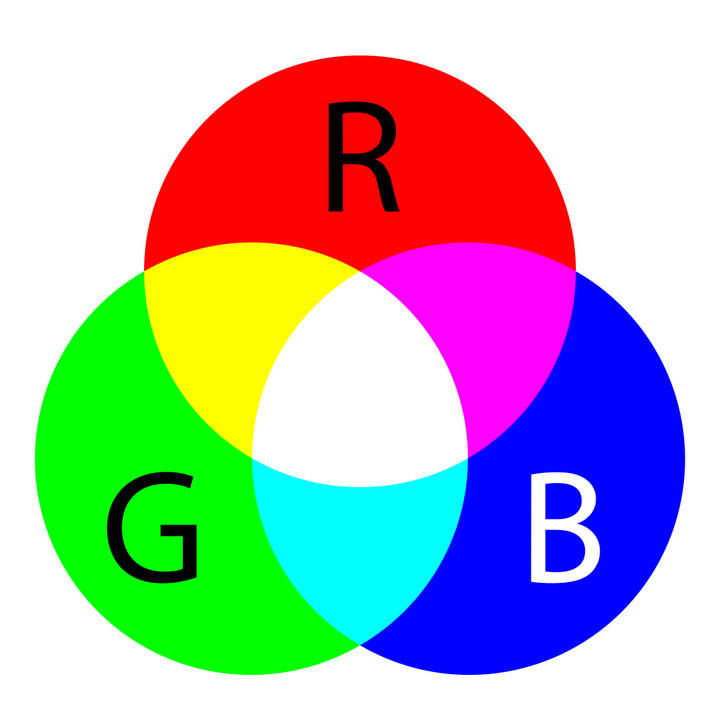

Одна из самых распространённых цветовых моделей. В её основе лежит воспроизведение любого цвета путем сложения трёх основных компонентов: красного (Red), зелёного (Green) и синего (Blue). Каждый компонент выражается через **число от 0 до 255**, которое характеризует количество этого компонента в конечном цвете.


### CMY/CMYK (CYAN, MAGENTA, YELLOW + BLACK)

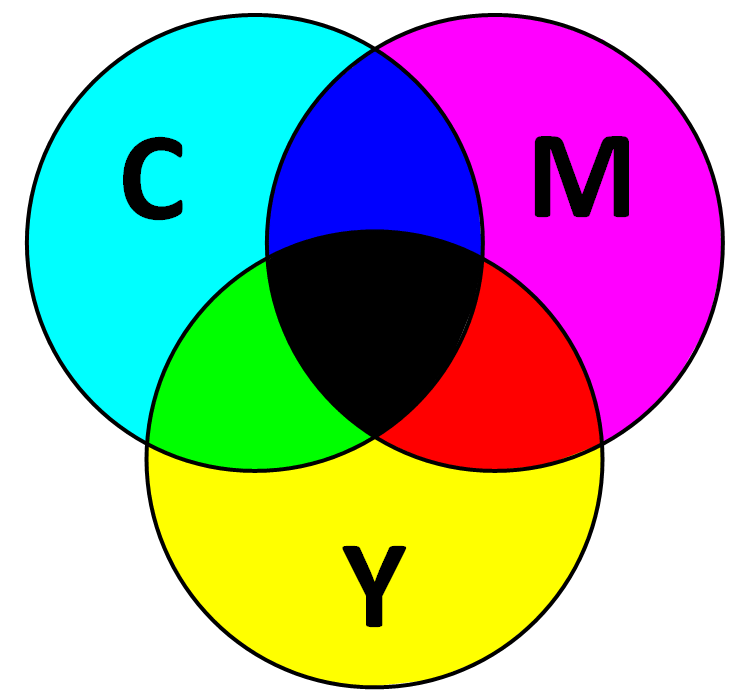

**Субтрактивная модель** — это модель, основанная на вычитании основных цветов из белого. 

**Белый цвет - RGB = CMY**

Буква K означает key color, или просто чёрный цвет. 

Эта цветовая модель создавалась для типографских нужд, где гораздо удобнее рассчитывать цвет по количеству отражённого от бумаги света, а не по количеству поглощённого (как в RGB). Референсный чёрный цвет в модель добавили, так как не очень точно получалось сделать чёрный цвет путем смешения различных красок. 

→ Эта модель почти не используется в обработке изображений: про неё важно знать лишь для общего развития.



### HSV/HSB (HUE, SATURATION, VALUE OR BRIGHTNESS)

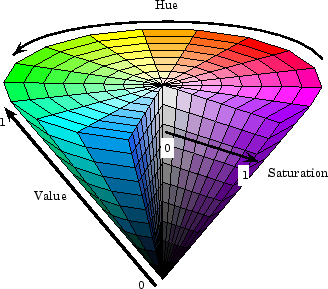
	
Эта цветовая модель может быть представлена как конус.

Что есть что?

**Hue** — цветовой тон. **Варьируется от 0 до 360.**

Цвет кодируется углом окружности. Можно заметить, что, в отличие от предыдущих цветовых моделей, здесь цвет пикселя характеризуется **одним числом.**

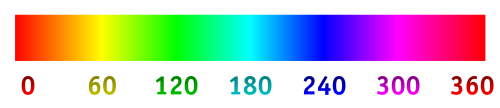

**Saturation** — насыщенность. Варьируется **от 0 до 1**, иногда **от 0 до 100**. Чем ближе параметр к 0, тем ближе цвет к нейтральному серому; чем ближе к 1, тем более насыщенным выглядит цвет.

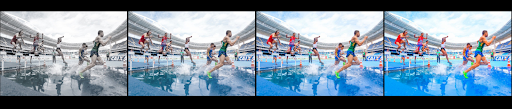

**Value/Brightness** — яркость. Также задаётся **от 0 до 1.**

Преимуществом этой цветовой модели является разделение информации о цвете и яркости. Например, если мы хотим выполнить выравнивание гистограммы яркости, то цвета меняться не должны. Это легко обеспечить в HSV-модели. Также эта модель лучше подходит для выделения объектов на изображении, потому что здесь очень просто задать порог, какие тона мы ищем.

❗️ Таким образом, возможно решить задачу сегментации дорожных знаков, так как дорожные знаки имеют стандартизированные цвета, и, задавая довольно узкий порог по цветовому тону, можно легко их выделять на изображении.

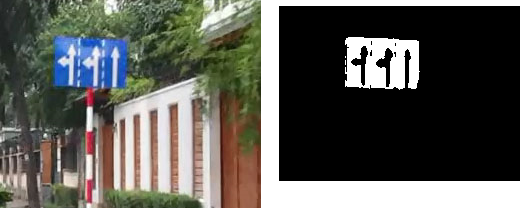

### Задание 2.2
Какой цветовой моделью можно выделить один цвет на изображении по порогу цветового тона?  
Ответ: HSV

⭐️ Итак, мы рассмотрели основные варианты представления цветных изображений. Теперь давайте познакомимся с одним из самых популярных инструментов для работы с такими изображениями — библиотекой openCV.